In [157]:
# 데이터 분석 모듈 준비
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [158]:
# 엑셀 파일을 읽어서 데이터프레임으로 저장
paths = "../data-files/population-in-seoul.xlsx"

# pop_in_seoul_excel = pd.read_excel(paths, header=None)
pop_in_seoul_excel = pd.read_excel(paths)
print(pop_in_seoul_excel.info())
pop_in_seoul_excel.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   동별(1)       2 non-null      object
 1   동별(2)       27 non-null     object
 2   2024 4/4    27 non-null     object
 3   2024 4/4.1  27 non-null     object
 4   2024 4/4.2  27 non-null     object
 5   2024 4/4.3  27 non-null     object
 6   2014        27 non-null     object
 7   2014.1      27 non-null     object
 8   2014.2      27 non-null     object
 9   2014.3      27 non-null     object
 10  2015        27 non-null     object
 11  2015.1      27 non-null     object
 12  2015.2      27 non-null     object
 13  2015.3      27 non-null     object
 14  2016        27 non-null     object
 15  2016.1      27 non-null     object
 16  2016.2      27 non-null     object
 17  2016.3      27 non-null     object
 18  2017        27 non-null     object
 19  2017.1      27 non-null     object
 20  2017.2      

c:\Users\human\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,동별(1),동별(2),2024 4/4,2024 4/4.1,2024 4/4.2,2024 4/4.3,2014,2014.1,2014.2,2014.3,...,2022.2,2022.3,2023,2023.1,2023.2,2023.3,2024,2024.1,2024.2,2024.3
0,동별(1),동별(2),계 (명),한국인 (명),등록외국인 (명),65세이상고령자 (명),계 (명),한국인 (명),등록외국인 (명),65세이상고령자 (명),...,등록외국인 (명),65세이상고령자 (명),계 (명),한국인 (명),등록외국인 (명),65세이상고령자 (명),계 (명),한국인 (명),등록외국인 (명),65세이상고령자 (명)
1,합계,소계,9597372,9331828,265544,1824895,10369593,10103233,266360,1221616,...,239297,1667411,9638799,9386034,252765,1743696,9597372,9331828,265544,1824895
2,NaN,종로구,149608,138336,11272,29840,165344,156993,8351,24537,...,10832,27958,150453,139417,11036,28764,149608,138336,11272,29840
3,NaN,중구,131214,120544,10670,26853,136227,128065,8162,19960,...,10348,25055,131793,121312,10481,25920,131214,120544,10670,26853
4,NaN,용산구,217194,203854,13340,39407,249914,235951,13963,34896,...,14634,39037,227106,213151,13955,39747,217194,203854,13340,39407


In [159]:
# 컬럼, 인덱스 정리

# 년도 범위 정의 
years = [year for year in range(2014,2025)]


pop_in_seoul = pop_in_seoul_excel.copy() 

# 행, 열 삭제
pop_in_seoul.drop([0,1], axis=0, inplace=True)
pop_in_seoul.drop(pop_in_seoul.columns[0], axis=1, inplace=True)
pop_in_seoul.drop(pop_in_seoul.columns[1:5], axis=1, inplace=True) # - 2024 4/4분기 삭제

#인덱스 지정
pop_in_seoul.rename(columns={pop_in_seoul.columns[0]:"자치구"}, inplace=True)
pop_in_seoul.set_index("자치구", inplace=True)

# 컬럼 지정
new_columns = []
l1 = ["계", "한국인", "외국인", "고령자"]
for year in years:
    for v in l1:
        new_columns.append(str(year)+v)
pop_in_seoul.columns = new_columns

# 타입 변경
pop_in_seoul.astype(int)

pop_in_seoul.head()

,2014계,2014한국인,2014외국인,2014고령자,2015계,2015한국인,2015외국인,2015고령자,2016계,2016한국인,...,2022외국인,2022고령자,2023계,2023한국인,2023외국인,2023고령자,2024계,2024한국인,2024외국인,2024고령자
자치구,,,,,,,,,,,,,,,,,,,,,
종로구,165344,156993,8351,24537,163822,154986,8836,24892,161922,152737,...,10832,27958,150453,139417,11036,28764,149608,138336,11272,29840
중구,136227,128065,8162,19960,134329,125733,8596,20302,134409,125249,...,10348,25055,131793,121312,10481,25920,131214,120544,10670,26853
용산구,249914,235951,13963,34896,247909,233342,14567,35715,245102,230241,...,14634,39037,227106,213151,13955,39747,217194,203854,13340,39407
성동구,303891,296086,7805,36684,305065,297003,8062,38164,307161,299259,...,7234,47720,284766,277361,7405,49462,281289,273669,7620,51245
광진구,377375,363354,14021,38974,375180,360369,14811,40368,372104,357215,...,13836,54071,351180,335554,15626,56819,348652,331963,16689,59743


In [160]:
# 한글 사용
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rcParams["font.family"] = font_name 

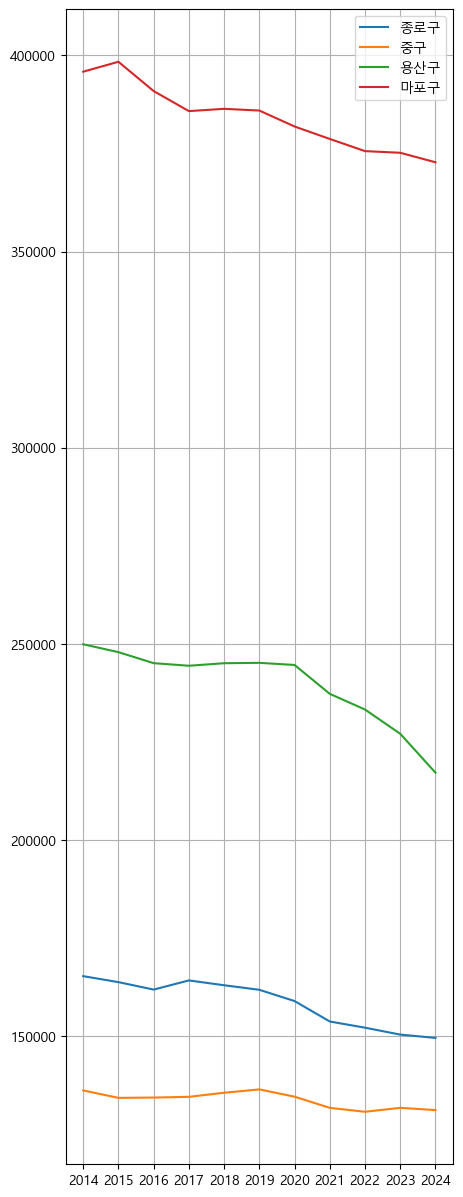

In [176]:
# 관심있는 3개 이상의 자치구의 년도별 인구변화를 선그래프로 표시

borough_List = ["종로구", "중구", "용산구", "마포구"]
fig, ax = plt.subplots(figsize=(5, 15))


for borough in borough_List:
    borough_pop = pop_in_seoul.loc[borough]
    ax.plot(years, [borough_pop[str(year)+"계"] for year in years], label = borough)


plt.xticks(years)
plt.grid(True)
plt.legend()
plt.show()


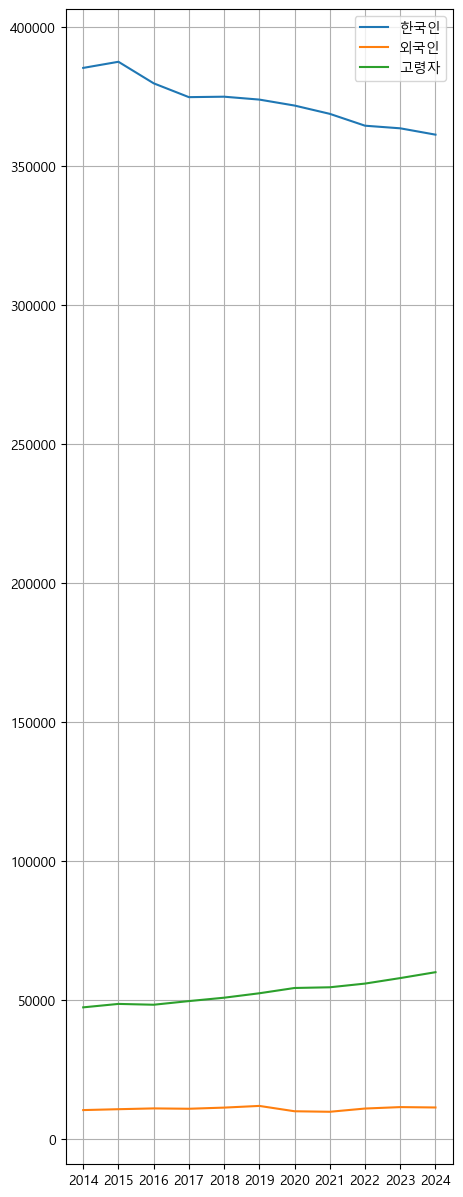

In [177]:
# 지역 하나의 한국인, 외국인, 고령자 수
borough2 = pop_in_seoul.loc["마포구"]
fig, ax = plt.subplots(figsize=(5, 15))

ax.plot(years, [borough_pop[str(year)+"한국인"] for year in years], label = "한국인")
ax.plot(years, [borough_pop[str(year)+"외국인"] for year in years], label = "외국인")
ax.plot(years, [borough_pop[str(year)+"고령자"] for year in years], label = "고령자")

plt.xticks(years)
plt.grid(True)
plt.legend()
plt.show()

C:\Users\human\AppData\Local\Temp\ipykernel_15368\2073647986.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


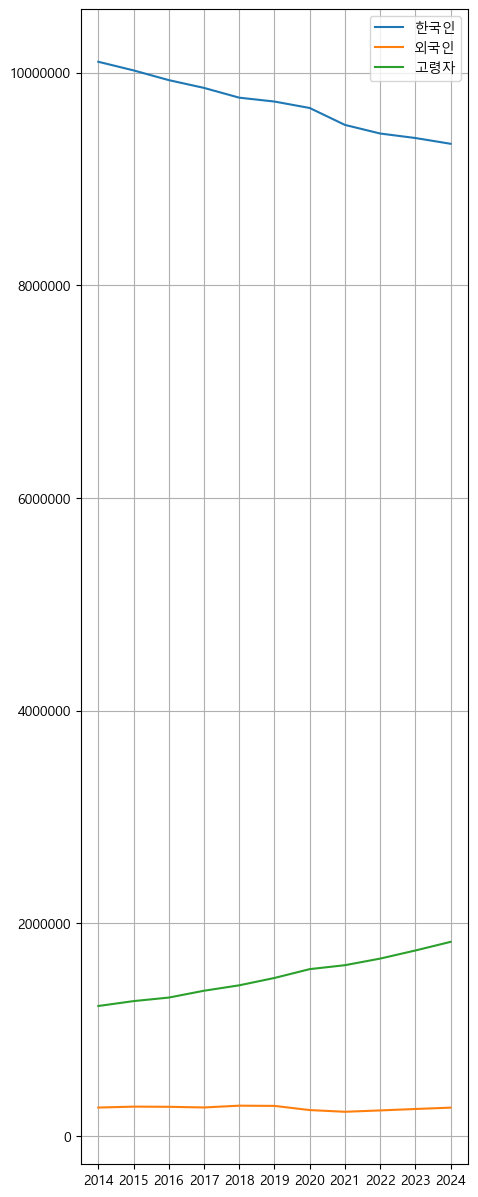

In [178]:
# 전체 지역에서의 한국인, 외국인, 고령자 수
fig, ax = plt.subplots(figsize=(5, 15))

ax.plot(years, [pop_in_seoul[str(year)+"한국인"].sum(axis=0) for year in years], label = "한국인")
ax.plot(years, [pop_in_seoul[str(year)+"외국인"].sum(axis=0) for year in years], label = "외국인")
ax.plot(years, [pop_in_seoul[str(year)+"고령자"].sum(axis=0) for year in years], label = "고령자")

plt.xticks(years)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.grid(True)
plt.legend()
plt.show()


772221 명 사라짐 


C:\Users\human\AppData\Local\Temp\ipykernel_15368\1363879032.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
C:\Users\human\AppData\Local\Temp\ipykernel_15368\1363879032.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


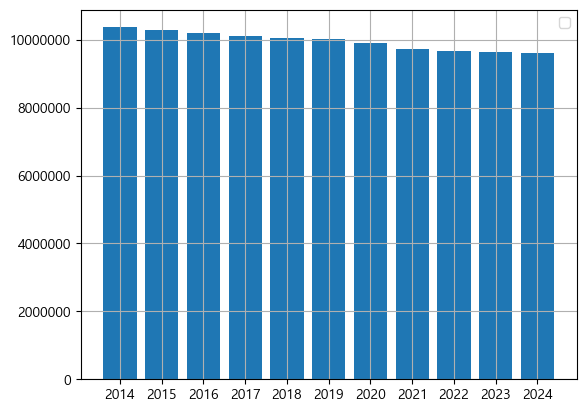

In [186]:
# 년도별 인구수 변화
#fig, ax = plt.subplots(figsize=(5, 15))

popList = [pop_in_seoul[str(year)+"계"].sum(axis=0) for year in years]

plt.bar(years, popList)

print(f"{popList[0] - popList[len(popList)-1]} 명 사라짐 ")

plt.xticks(years)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.grid(True)
plt.legend()
plt.show()